In [132]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [133]:
pd.read_csv("D:/Ad_py_lib.csv/project/insurance.csv")

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### EDA

In [134]:
df=pd.read_csv("D:/Ad_py_lib.csv/project/insurance.csv")

In [135]:
df.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [136]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [137]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [138]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

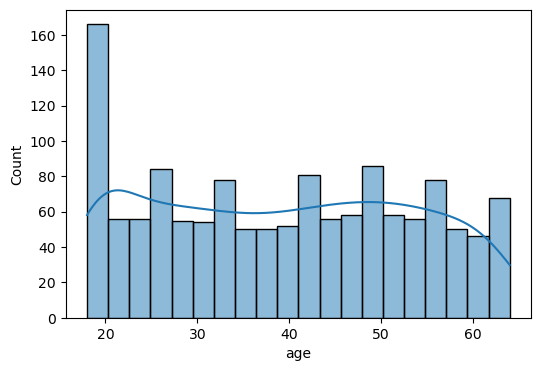

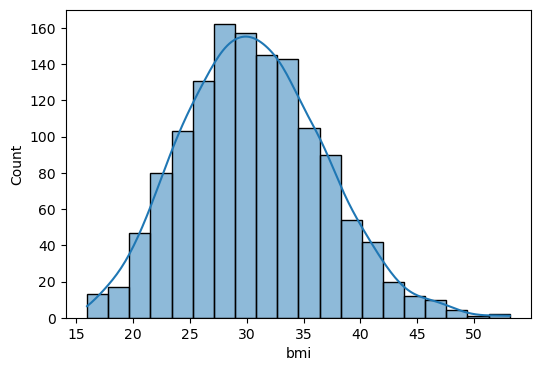

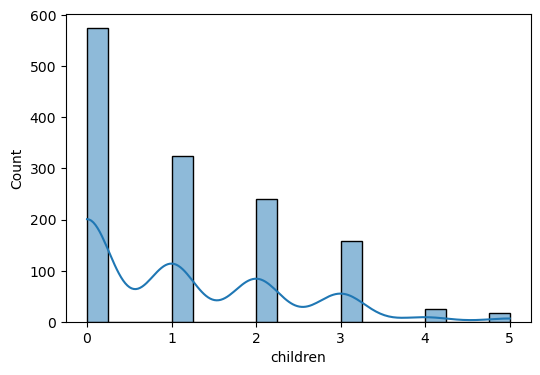

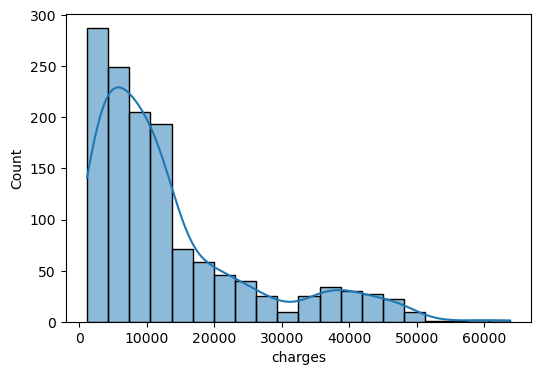

In [140]:
numeric_col=['age','bmi','children','charges']
for col in numeric_col: 
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)
    

<Axes: xlabel='children', ylabel='count'>

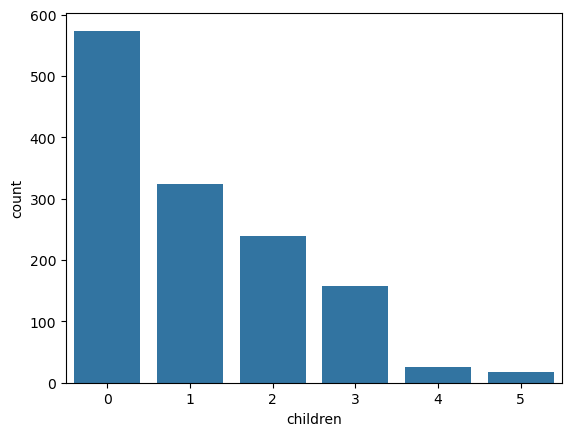

In [141]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

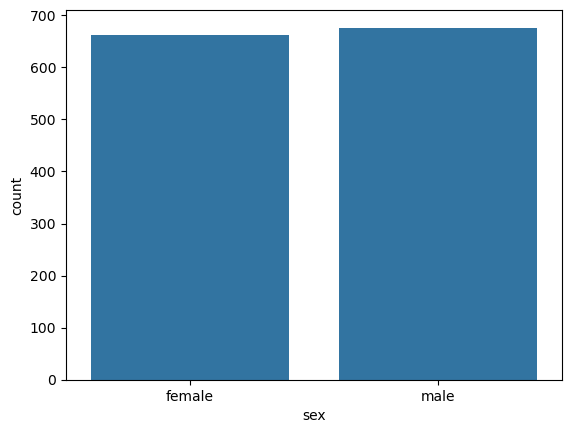

In [142]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

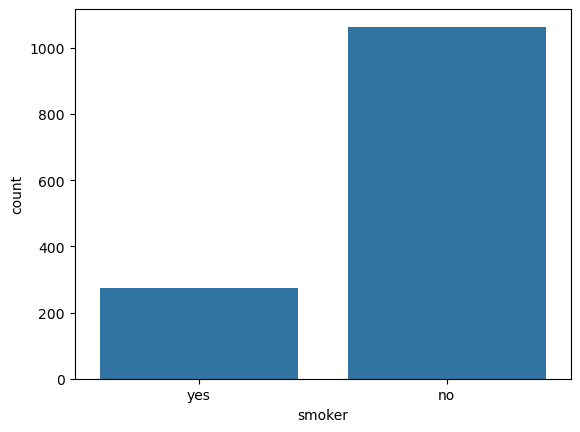

In [143]:
sns.countplot(x=df['smoker'])

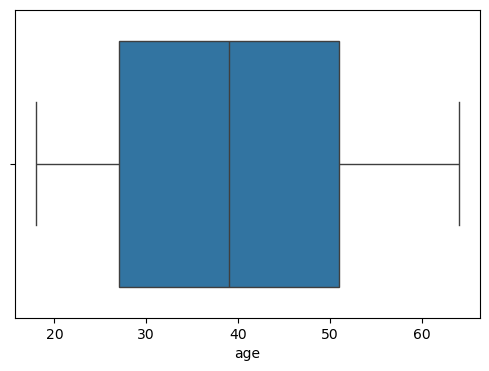

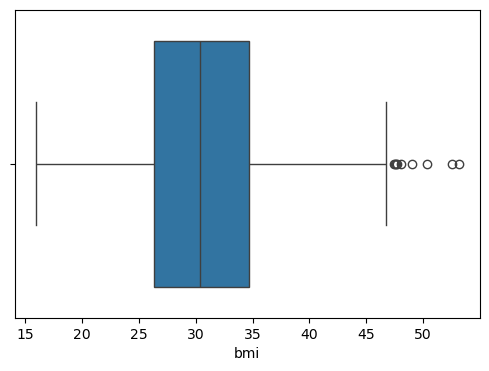

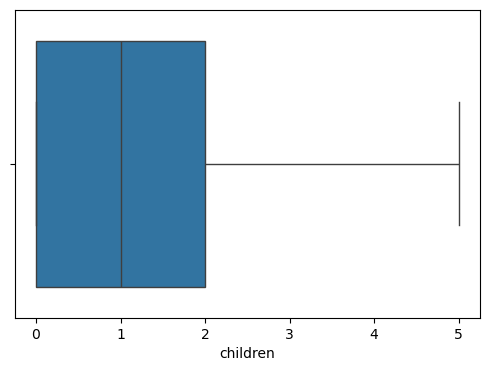

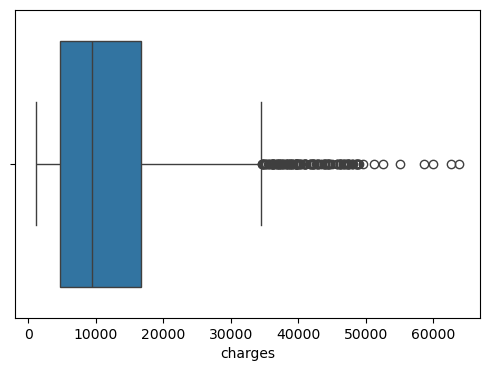

In [144]:
numeric_col=['age','bmi','children','charges']
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    

<Axes: >

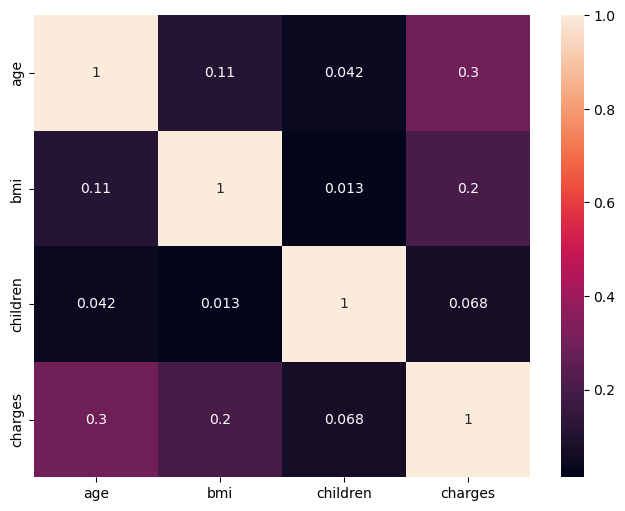

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Data cleaning and Preprocessing

In [146]:
df_cleaned=df.copy()

In [147]:
df_cleaned.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [148]:
df_cleaned.shape

(1338, 7)

In [149]:
df_cleaned.drop_duplicates(inplace=True)

In [150]:
df_cleaned.shape

(1337, 7)

In [151]:
df_cleaned.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [152]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [153]:
df_cleaned.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

In [154]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

### Incoder

In [155]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})

In [156]:
df_cleaned

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [157]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [158]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'no':1,'yes':0})

In [159]:
df_cleaned

age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       0  southwest  16884.92400
1      18    0  33.770         1       1  southeast   1725.55230
2      28    0  33.000         3       1  southeast   4449.46200
3      33    0  22.705         0       1  northwest  21984.47061
4      32    0  28.880         0       1  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       1  northwest  10600.54830
1334   18    1  31.920         0       1  northeast   2205.98080
1335   18    1  36.850         0       1  southeast   1629.83350
1336   21    1  25.800         0       1  southwest   2007.94500
1337   61    1  29.070         0       0  northwest  29141.36030

[1337 rows x 7 columns]

In [160]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
},inplace=True)

In [161]:
df_cleaned


age  is_female     bmi  children  is_smoker     region      charges
0      19          1  27.900         0          0  southwest  16884.92400
1      18          0  33.770         1          1  southeast   1725.55230
2      28          0  33.000         3          1  southeast   4449.46200
3      33          0  22.705         0          1  northwest  21984.47061
4      32          0  28.880         0          1  northwest   3866.85520
...   ...        ...     ...       ...        ...        ...          ...
1333   50          0  30.970         3          1  northwest  10600.54830
1334   18          1  31.920         0          1  northeast   2205.98080
1335   18          1  36.850         0          1  southeast   1629.83350
1336   21          1  25.800         0          1  southwest   2007.94500
1337   61          1  29.070         0          0  northwest  29141.36030

[1337 rows x 7 columns]

In [162]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [163]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [164]:
df_cleaned

age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          0  16884.92400   
1      18          0  33.770         1          1   1725.55230   
2      28          0  33.000         3          1   4449.46200   
3      33          0  22.705         0          1  21984.47061   
4      32          0  28.880         0          1   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          1  10600.54830   
1334   18          1  31.920         0          1   2205.98080   
1335   18          1  36.850         0          1   1629.83350   
1336   21          1  25.800         0          1   2007.94500   
1337   61          1  29.070         0          0  29141.36030   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True             False  
3                 True             False             False  
4                 True             False             False  
...                ...               ...               ...  
1333              True             False             False  
1334             False             False             False  
1335             False              True             False  
1336             False             False              True  
1337              True             False             False  

[1337 rows x 9 columns]

In [165]:
df_cleaned=df_cleaned.astype(int)

In [166]:
df_cleaned


age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          0    16884                 0   
1      18          0   33         1          1     1725                 0   
2      28          0   33         3          1     4449                 0   
3      33          0   22         0          1    21984                 1   
4      32          0   28         0          1     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          1    10600                 1   
1334   18          1   31         0          1     2205                 0   
1335   18          1   36         0          1     1629                 0   
1336   21          1   25         0          1     2007                 0   
1337   61          1   29         0          0    29141                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 9 columns]

### Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

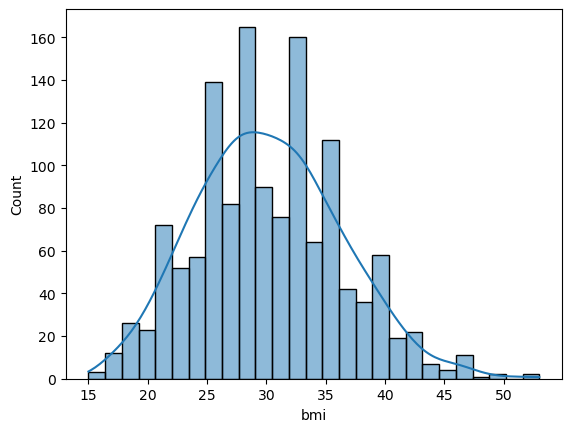

In [167]:
sns.histplot(df_cleaned['bmi'],kde=True)

In [168]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')], 
    labels=['Under_weight','Normal','Over_weight','Obese']
)

In [169]:
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          0    16884                 0   
1      18          0   33         1          1     1725                 0   
2      28          0   33         3          1     4449                 0   
3      33          0   22         0          1    21984                 1   
4      32          0   28         0          1     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          1    10600                 1   
1334   18          1   31         0          1     2205                 0   
1335   18          1   36         0          1     1629                 0   
1336   21          1   25         0          1     2007                 0   
1337   61          1   29         0          0    29141                 1   

      region_southeast  region_southwest bmi_category  
0                    0                 1  Over_weight  
1                    1                 0        Obese  
2                    1                 0        Obese  
3                    0                 0       Normal  
4                    0                 0  Over_weight  
...                ...               ...          ...  
1333                 0                 0        Obese  
1334                 0                 0        Obese  
1335                 1                 0        Obese  
1336                 0                 1  Over_weight  
1337                 0                 0  Over_weight  

[1337 rows x 10 columns]

In [170]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [171]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.head()

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0   19          1   27         0          0    16884                 0   
1   18          0   33         1          1     1725                 0   
2   28          0   33         3          1     4449                 0   
3   33          0   22         0          1    21984                 1   
4   32          0   28         0          1     3866                 1   

   region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 0                    0   
3                 0                 0                    1   
4                 0                 0                    0   

   bmi_category_Over_weight  bmi_category_Obese  
0                         1                   0  
1                         0                   1  
2                         0                   1  
3                         0                   0  
4                         1                   0

In [172]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Over_weight',
       'bmi_category_Obese'],
      dtype='object')

In [173]:
from sklearn.preprocessing import StandardScaler
col=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[col]=scaler.fit_transform(df_cleaned[col])

In [174]:
df_cleaned.head()

age  is_female       bmi  children  is_smoker  charges  \
0 -1.440418          1 -0.517949 -0.909234          0    16884   
1 -1.511647          0  0.462463 -0.079442          1     1725   
2 -0.799350          0  0.462463  1.580143          1     4449   
3 -0.443201          0 -1.334960 -0.909234          1    21984   
4 -0.514431          0 -0.354547 -0.909234          1     3866   

   region_northwest  region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 0                 1                    0   
1                 0                 1                 0                    0   
2                 0                 1                 0                    0   
3                 1                 0                 0                    1   
4                 1                 0                 0                    0   

   bmi_category_Over_weight  bmi_category_Obese  
0                         1                   0  
1                         0                   1  
2                         0                   1  
3                         0                   0  
4                         1                   0

### 

### Feature Extraction

In [175]:
from scipy.stats import pearsonr
selected_features=['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal','bmi_category_Over_weight','bmi_category_Obese']
correlations={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}
correlations_df=pd.DataFrame(list(correlations.items()),columns=['feature','pearson correlation'])
correlations_df.sort_values(by='pearson correlation',ascending=False )

feature  pearson correlation
0                        age             0.298309
10        bmi_category_Obese             0.200348
2                        bmi             0.196236
6           region_southeast             0.073577
3                   children             0.067390
5           region_northwest            -0.038695
7           region_southwest            -0.043637
1                  is_female            -0.058046
8        bmi_category_Normal            -0.104042
9   bmi_category_Over_weight            -0.120601
4                  is_smoker            -0.787234

In [176]:
 cat_features=[
    'is_female', 'is_smoker' ,'region_northwest',
     'region_southeast','region_southwest',
      'bmi_category_Normal','bmi_category_Over_weight',
     'bmi_category_Obese']

In [177]:
from scipy.stats import chi2_contingency
import pandas as pd 
alpha=0.05
df_cleaned['charges_bin']=pd.qcut(df_cleaned['charges']
                                 ,q=4,labels=False)
chi2_results={} 
for col in cat_features: 
    contingency=pd.crosstab(df_cleaned[col],df_cleaned
                           ['charges_bin'])
    chi2_stat,p_val,_,_=chi2_contingency(contingency)
    decision='Rejected Null (Keep Feature)' if p_val<alpha else 'Accept Null (Drop Feature)' 
    chi2_results[col]={
        'chi2_statictic':chi2_stat,
        'p_value':p_val,
        'Decision': decision
    }
chi2_df=pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by='p_value')
chi2_df

chi2_statictic   p_value  \
is_smoker                    848.219178       0.0   
region_southeast              15.998167  0.001135   
is_female                     10.258784   0.01649   
bmi_category_Obese             8.515711  0.036473   
region_southwest               5.091893  0.165191   
bmi_category_Over_weight        4.25149  0.235557   
bmi_category_Normal            3.708088   0.29476   
region_northwest                1.13424  0.768815   

                                              Decision  
is_smoker                 Rejected Null (Keep Feature)  
region_southeast          Rejected Null (Keep Feature)  
is_female                 Rejected Null (Keep Feature)  
bmi_category_Obese        Rejected Null (Keep Feature)  
region_southwest            Accept Null (Drop Feature)  
bmi_category_Over_weight    Accept Null (Drop Feature)  
bmi_category_Normal         Accept Null (Drop Feature)  
region_northwest            Accept Null (Drop Feature)

In [178]:
final_df=df_cleaned[['age',
    'is_female', 'bmi','children', 
    'is_smoker','charges',
     'region_southeast',
    'bmi_category_Obese']]

In [179]:
final_df

age  is_female       bmi  children  is_smoker  charges  \
0    -1.440418          1 -0.517949 -0.909234          0    16884   
1    -1.511647          0  0.462463 -0.079442          1     1725   
2    -0.799350          0  0.462463  1.580143          1     4449   
3    -0.443201          0 -1.334960 -0.909234          1    21984   
4    -0.514431          0 -0.354547 -0.909234          1     3866   
...        ...        ...       ...       ...        ...      ...   
1333  0.767704          0 -0.027743  1.580143          1    10600   
1334 -1.511647          1  0.135659 -0.909234          1     2205   
1335 -1.511647          1  0.952670 -0.909234          1     1629   
1336 -1.297958          1 -0.844753 -0.909234          1     2007   
1337  1.551231          1 -0.191145 -0.909234          0    29141   

      region_southeast  bmi_category_Obese  
0                    0                   0  
1                    1                   1  
2                    1                   1  
3                    0                   0  
4                    0                   0  
...                ...                 ...  
1333                 0                   1  
1334                 0                   1  
1335                 1                   1  
1336                 0                   0  
1337                 0                   0  

[1337 rows x 8 columns]

In [221]:
from sklearn.model_selection import train_test_split
X=final_df.drop('charges',axis=1)
y=final_df['charges']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [225]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() 
model.fit(X_train,y_train)


LinearRegression()

In [227]:
y_pred=model.predict(X_test)

In [229]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
# r2
n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7987962362937231

In [181]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [182]:
df=pd.read_csv("D:/Ad_py_lib.csv/project/heart (1).csv")

In [183]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [184]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [185]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [186]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [187]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

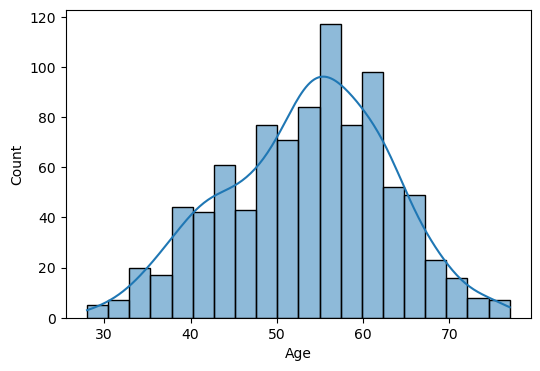

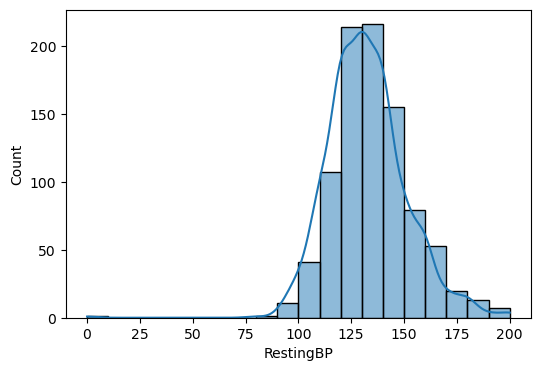

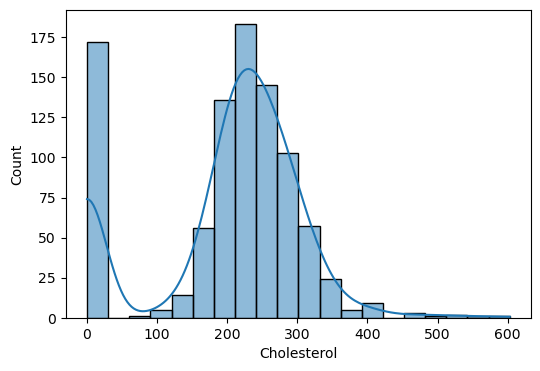

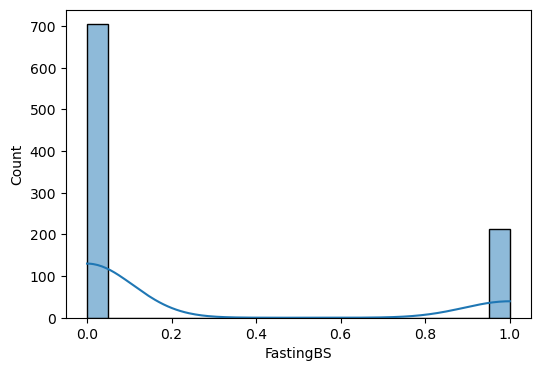

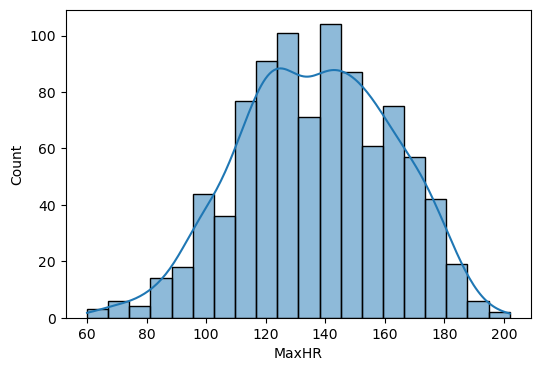

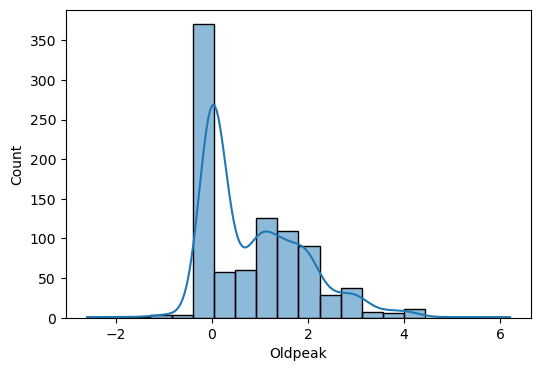

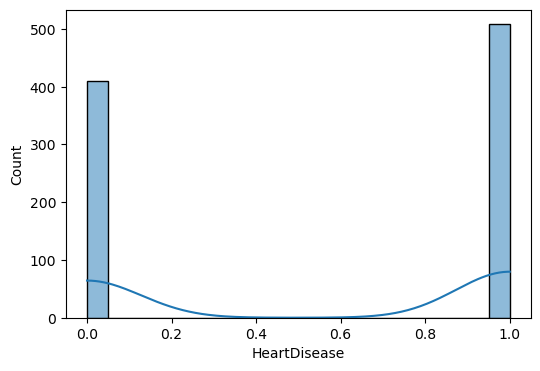

In [188]:
int_columns=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']
for cols in int_columns: 
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols],bins=20,kde=True,)

In [189]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

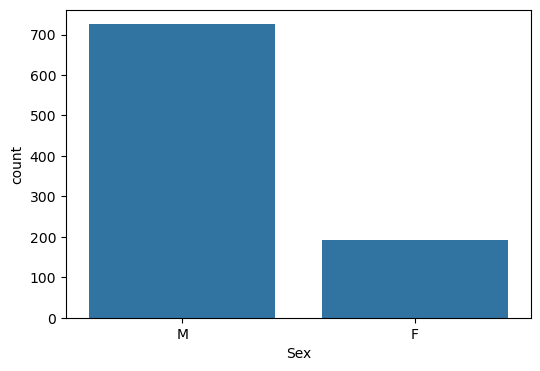

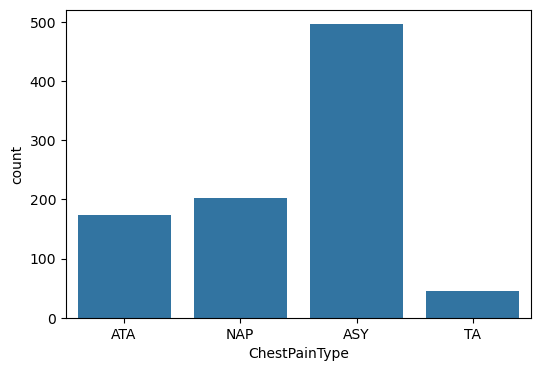

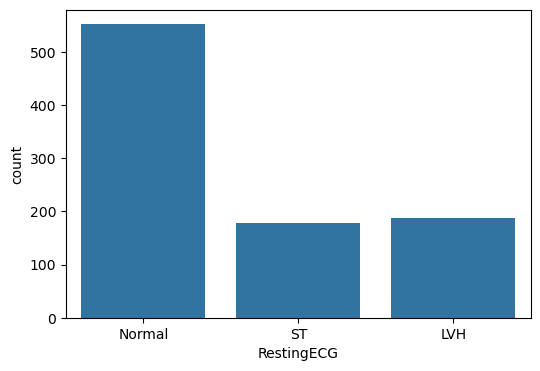

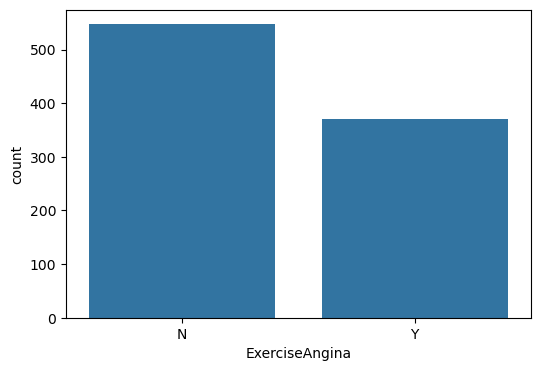

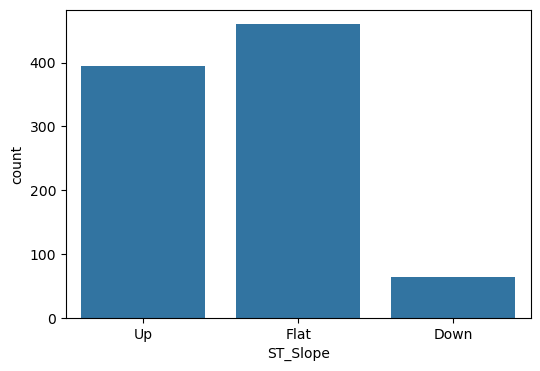

In [190]:
obj_columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in obj_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])

In [191]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [192]:
df.value_counts('Sex')

Sex
M    725
F    193
Name: count, dtype: int64

In [193]:
df.value_counts('FastingBS')

FastingBS
0    704
1    214
Name: count, dtype: int64

In [194]:
df.value_counts('ExerciseAngina')

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

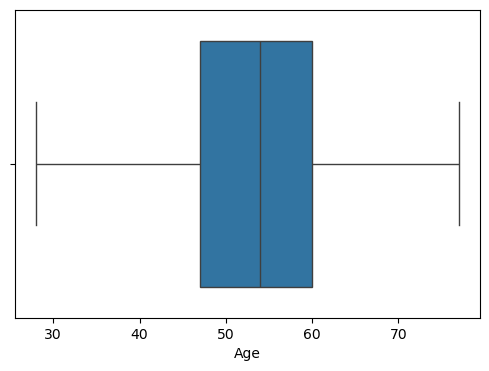

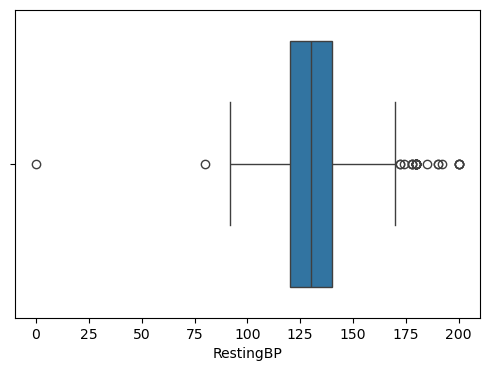

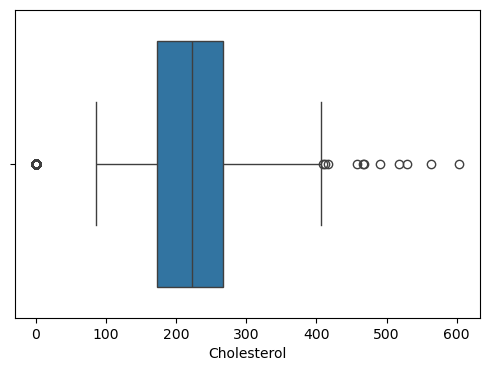

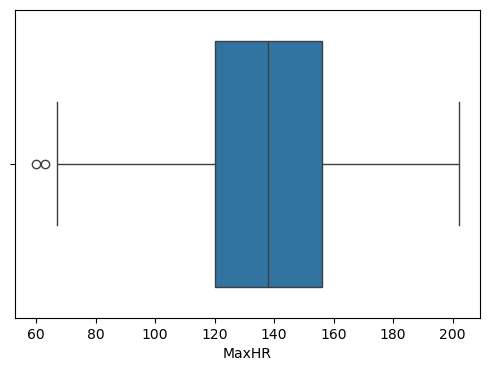

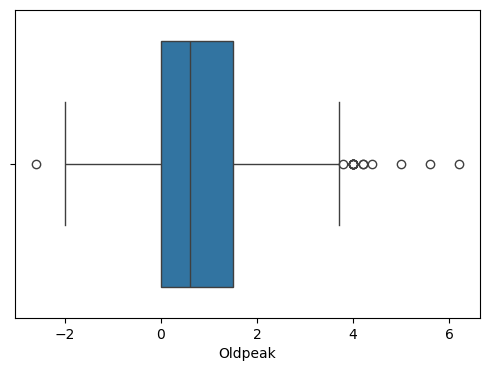

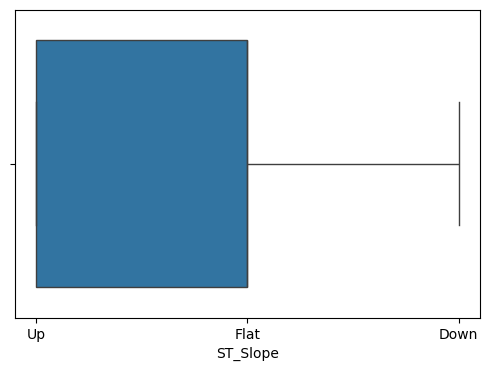

In [195]:
all_columns=['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak', 'ST_Slope']
for all_cols in all_columns: 
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[all_cols])

In [196]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [197]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

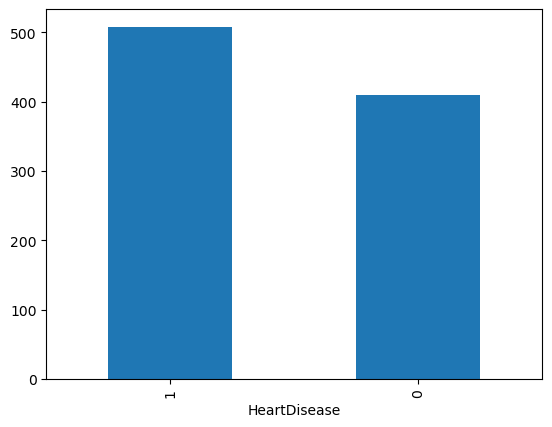

In [198]:
df['HeartDisease'].value_counts().plot(kind="bar")

In [199]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

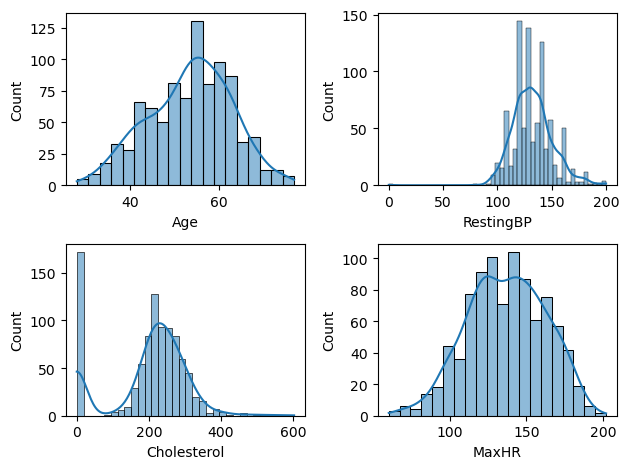

In [200]:
def plotting(var,num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
    
plotting('Age',1)
plotting('RestingBP',2) 
plotting('Cholesterol',3) 
plotting('MaxHR',4) 
plt.tight_layout()

In [201]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [202]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [203]:
ch_mean

np.float64(244.6353887399464)

In [204]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)


In [205]:
ch_mean

np.float64(244.6353887399464)

In [206]:
restinBP_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean() 
df['RestingBP']=df['RestingBP'].replace(0,ch_mean)
df['RestingBP']=df['RestingBP'].round(2)


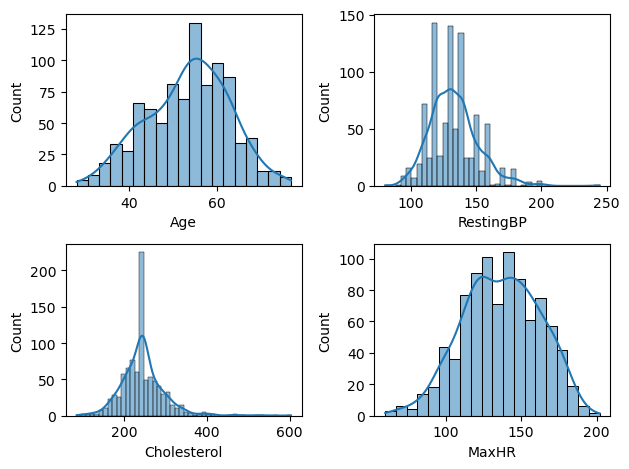

In [207]:
def plotting(var,num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
    
plotting('Age',1)
plotting('RestingBP',2) 
plotting('Cholesterol',3) 
plotting('MaxHR',4) 
plt.tight_layout()


<Axes: xlabel='Sex', ylabel='count'>

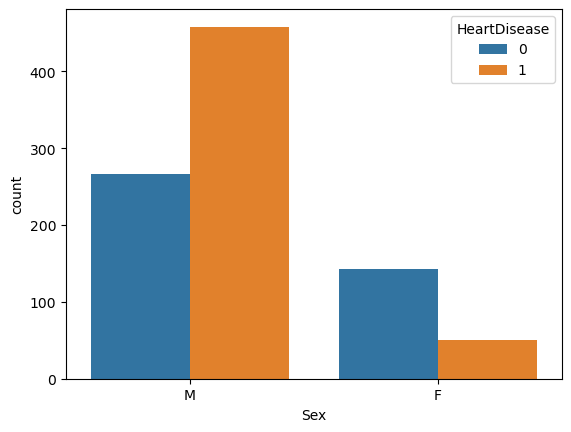

In [208]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

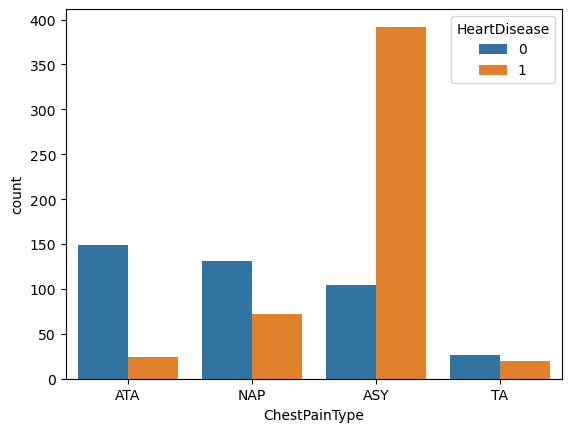

In [209]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

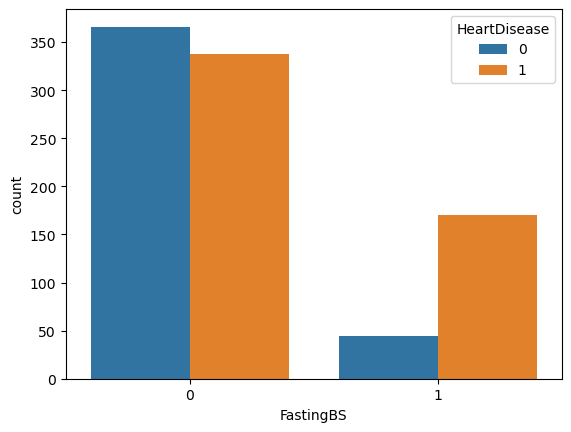

In [210]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

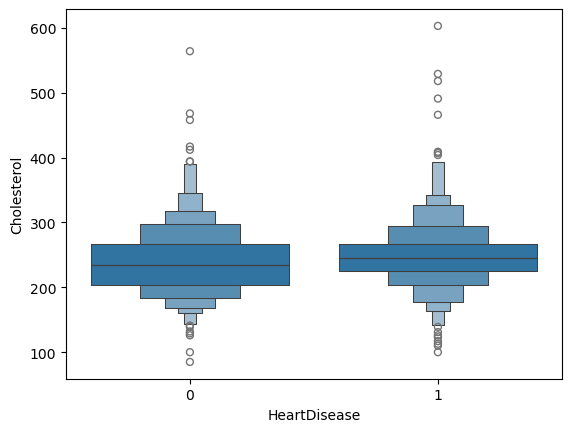

In [211]:
sns.boxenplot(x='HeartDisease',y='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

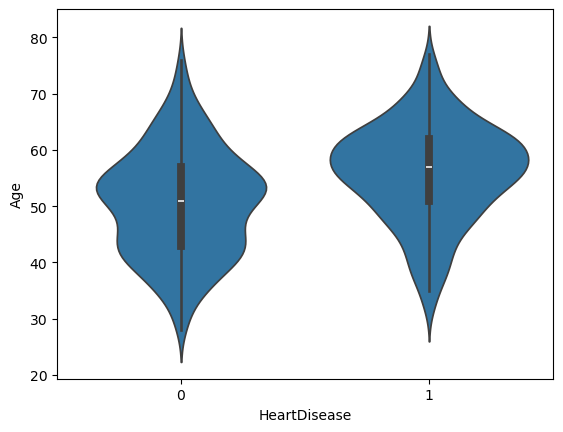

In [212]:
sns.violinplot(x='HeartDisease',y='Age',data=df)

<Axes: >

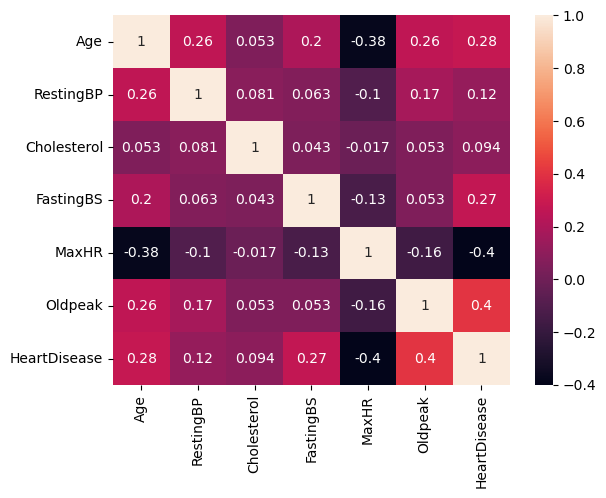

In [213]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Data preprocessing

In [214]:
df_encode=pd.get_dummies(df,drop_first=True)

In [215]:
df_encode

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40      140.0        289.0          0    172      0.0             0   
1     49      160.0        180.0          0    156      1.0             1   
2     37      130.0        283.0          0     98      0.0             0   
3     48      138.0        214.0          0    108      1.5             1   
4     54      150.0        195.0          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45      110.0        264.0          0    132      1.2             1   
914   68      144.0        193.0          1    141      3.4             1   
915   57      130.0        131.0          0    115      1.2             1   
916   57      130.0        236.0          0    174      0.0             1   
917   38      138.0        175.0          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0     True               True              False             False   
1    False              False               True             False   
2     True               True              False             False   
3    False              False              False             False   
4     True              False               True             False   
..     ...                ...                ...               ...   
913   True              False              False              True   
914   True              False              False             False   
915   True              False              False             False   
916  False               True              False             False   
917   True              False               True             False   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                 True          False             False          False   
1                 True          False             False           True   
2                False           True             False          False   
3                 True          False              True           True   
4                 True          False             False          False   
..                 ...            ...               ...            ...   
913               True          False             False           True   
914               True          False             False           True   
915               True          False              True           True   
916              False          False             False           True   
917               True          False             False          False   

     ST_Slope_Up  
0           True  
1          False  
2           True  
3          False  
4           True  
..           ...  
913        False  
914        False  
915        False  
916        False  
917         True  

[918 rows x 16 columns]

In [216]:
df_encode=df_encode.astype(int)

In [217]:
df_encode

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [218]:
from sklearn.preprocessing import StandardScaler
numerical_cols=['Age','RestingBP','Cholesterol',
                'MaxHR','Oldpeak']
scaler=StandardScaler() 
df_encode[numerical_cols]=scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.399826     0.834754          0  1.382928 -0.727592   
1 -0.478484   1.489614    -1.210675          0  0.754157  0.282891   
2 -1.751359  -0.145068     0.722161          0 -1.525138 -0.727592   
3 -0.584556   0.290847    -0.572651          0 -1.132156  0.282891   
4  0.051881   0.944720    -0.929194          0 -0.581981 -0.727592   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0      1                  1                  0   
1             1      0                  0                  1   
2             0      1                  1                  0   
3             1      0                  0                  0   
4             0      1                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0                 0                  1              0                 0   
1                 0                  1              0                 0   
2                 0                  0              1                 0   
3                 0                  1              0                 1   
4                 0                  1              0                 0   

   ST_Slope_Flat  ST_Slope_Up  
0              0            1  
1              1            0  
2              0            1  
3              1            0  
4              0            1